In [ ]:
from __future__ import unicode_literals
#from gensim.summarization import keywords
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import pdb
import string
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
import unicodedata
!pip install sumy
import re

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

df =pd.read_csv('./JD_DataScience_USA_small_1.csv', encoding= 'unicode_escape')
df1 = pd.read_csv('./Resume_DataScience_Updated.csv', encoding= 'unicode_escape')

jd = df['description'].tolist()
companies = df['company'].tolist()
positions = df['title'].tolist()
#print(jd[0])

resume = df1['Resume'].tolist()
#print(resume[0])

cleanedjd = [x for x in jd if str(x) != 'nan']
cleanedresume = [x for x in resume if str(x) != 'nan']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(cleanedjd)
print(cleanedresume)

["As a Data Scientist at Meta, you will shape the future of people-facing and business-facing products we build across our entire family of applications (Facebook, Instagram, Messenger, WhatsApp, Oculus). By applying your technical skills, analytical mindset, and product intuition to one of the richest data sets in the world, you will help define the experiences we build for billions of people and hundreds of millions of businesses around the world. You will collaborate on a wide array of product and business problems with a diverse set of cross-functional partners across Product, Engineering, Research, Data Engineering, Marketing, Sales, Finance and others. You will use data and analysis to identify and solve product development\x83??s biggest challenges. You will influence product strategy and investment decisions with data, be focused on impact, and collaborate with other teams. By joining Meta, you will become part of a world-class analytics community dedicated to skill development

In [ ]:
def chunks_sent(text):

    doc = nlp(text)
    #print(doc)
    # Extract the noun phrases from the sentence
    noun_phrases = [chunk.text for chunk in doc.noun_chunks]

    # Print the noun phrases
    print(noun_phrases)
    return noun_phrases


cleanedjd = [chunks_sent(element) for element in cleanedjd]
cleanedresume = [chunks_sent(element) for element in cleanedresume]

print(cleanedjd)
print(cleanedresume)

['a Data Scientist', 'Meta', 'you', 'the future', 'people-facing and business-facing products', 'we', 'our entire family', 'applications', 'Facebook', 'Instagram', 'Messenger', 'WhatsApp', 'Oculus', 'your technical skills', 'analytical mindset', 'product intuition', 'the richest data sets', 'the world', 'you', 'the experiences', 'we', 'billions', 'people', 'hundreds of millions', 'businesses', 'the world', 'You', 'a wide array', 'product and business problems', 'a diverse set', 'cross-functional partners', 'Product', 'Engineering', 'Research', 'Data Engineering', 'Marketing', 'Sales', 'Finance', 'others', 'You', 'data', 'analysis', 'product development\x83??s biggest challenges', 'You', 'product strategy', 'investment decisions', 'data', 'impact', 'other teams', 'Meta', 'you', 'part', 'a world-class analytics community', 'skill development', 'career growth', 'analytics', 'Product leadership', 'You', 'data', 'product development', 'new opportunities', 'upcoming challenges', 'the product

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')[0:200]

# Define the stop words to remove
#stop_words = set(stopwords.words('english'))

def remove_stop_words(mylist):
    # Define the list of lists
    #my_list = [['me apple', 'banana\n', 'i orange'], ['our carrot', '\rcelery', 'lettuce'], ['e.g. cat', 'dog', 'bird']]

    # Define the regular expression pattern for articles
    pattern = r'^(a|an)\s'


    # Iterate through the list of lists and remove articles from phrases starting with 'a' or 'an'
    for i in range(len(mylist)):
        for j in range(len(mylist[i])):
                mylist[i][j] = re.sub(r'[^a-zA-Z0-9\s]', '', mylist[i][j])
                #my_list[i][j] = my_list[i][j].replace('e.g.', '')
                mylist[i][j] = mylist[i][j].replace('\n', '')
                mylist[i][j] = mylist[i][j].replace('\r', '')
                words = mylist[i][j].lower().split()
                words = [word for word in words if word not in stop_words]
                mylist[i][j] = ' '.join(words)
                mylist[i][j] = re.sub(pattern, '', mylist[i][j])

    # Print the modified list of lists
    print(mylist)
    return mylist



In [ ]:
  cleanedjd = [remove_stop_words(cleanedjd)]
  cleanedresume = [remove_stop_words(cleanedresume)]

[['data scientist', 'meta', '', 'future', 'peoplefacing businessfacing products', '', 'entire family', 'applications', 'facebook', 'instagram', 'messenger', 'whatsapp', 'oculus', 'technical skills', 'analytical mindset', 'product intuition', 'richest data sets', 'world', '', 'experiences', '', 'billions', 'people', 'hundreds millions', 'businesses', 'world', '', 'wide array', 'product business problems', 'diverse set', 'crossfunctional partners', 'product', 'engineering', 'research', 'data engineering', 'marketing', 'sales', 'finance', 'others', '', 'data', 'analysis', 'product developments biggest challenges', '', 'product strategy', 'investment decisions', 'data', 'impact', 'teams', 'meta', '', 'part', 'worldclass analytics community', 'skill development', 'career growth', 'analytics', 'product leadership', '', 'data', 'product development', 'new opportunities', 'upcoming challenges', 'products', '', 'value', 'people', 'businesses', 'meta', '', 'partner teams', '', 'set goals', 'prod

In [ ]:
# Remove empty values from the list
cleanedjd = [value for value in cleanedjd if value]
cleanedresume = [value for value in cleanedresume if value]
# Print the modified list
print(cleanedjd)
print(cleanedresume)

[[['data scientist', 'meta', '', 'future', 'peoplefacing businessfacing products', '', 'entire family', 'applications', 'facebook', 'instagram', 'messenger', 'whatsapp', 'oculus', 'technical skills', 'analytical mindset', 'product intuition', 'richest data sets', 'world', '', 'experiences', '', 'billions', 'people', 'hundreds millions', 'businesses', 'world', '', 'wide array', 'product business problems', 'diverse set', 'crossfunctional partners', 'product', 'engineering', 'research', 'data engineering', 'marketing', 'sales', 'finance', 'others', '', 'data', 'analysis', 'product developments biggest challenges', '', 'product strategy', 'investment decisions', 'data', 'impact', 'teams', 'meta', '', 'part', 'worldclass analytics community', 'skill development', 'career growth', 'analytics', 'product leadership', '', 'data', 'product development', 'new opportunities', 'upcoming challenges', 'products', '', 'value', 'people', 'businesses', 'meta', '', 'partner teams', '', 'set goals', 'pro

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Define the list of lists
my_list = [['An apple', 'banana', 'a orange'], ['the carrot', 'celery', 'lettuce'], ['eg cat', 'dog', 'bird']]

# Define the stop words to remove
stop_words = set(stopwords.words('english'))

# Remove stop words from the list of lists
for i in range(len(my_list)):
    for j in range(len(my_list[i])):
        words = my_list[i][j].lower().split()
        words = [word for word in words if word not in stop_words]
        my_list[i][j] = ' '.join(words)

# Print the modified list of lists
print(my_list)

[['apple', 'banana', 'orange'], ['carrot', 'celery', 'lettuce'], ['eg cat', 'dog', 'bird']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('stopwords')

def preprocess_text(text):
    # lowercase
    #pdb.set_trace()
    text = text.lower()

    # Remove special characters using regular expression
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.replace('e.g.', '')
    text = text.replace('\n', '')
    text = text.replace('\r', '')
    text = re.sub('\s+', ' ', text).strip()
    # Check characters to see if they are in punctuation
    text = [char for char in text if char not in string.punctuation]

    # Join the characters again to form the string.
    text = ''.join(text)

    #print(nopunc)
    from nltk.corpus import stopwords
    stopwords.words('english')[0:200] # Show some stop words
    text.split()

    # Now just remove any stopwords
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    text = ' '.join(text)
    print(text)



    # # remove special characters and digits
    # #text = re.sub('[^a-zA-Z]+', ' ', text)

    # # remove stopwords
    # stop_words = set(stopwords.words('english'))
    # tokens = text.split()
    # filtered_tokens = [token for token in tokens if token not in stop_words]
    # text = ' '.join(filtered_tokens)

    # # remove extra spaces
    # text = re.sub('\s+', ' ', text).strip()

    # # remov puntuations
    # text = [char for char in text if char not in string.punctuation]

    return text


# apply the function to the JD and Resume columns of the dataframe
#cleanedjd = cleanedjd.apply(preprocess_text)
#cleanedresume = cleanedresume.apply(preprocess_text)


cleanedjd = [preprocess_text(element) for element in cleanedjd]
cleanedresume = [preprocess_text(element) for element in cleanedresume]

print(cleanedjd)
print(cleanedresume)


data scientist meta shape future peoplefacing businessfacing products build across entire family applications facebook instagram messenger whatsapp oculus applying technical skills analytical mindset product intuition one richest data sets world help define experiences build billions people hundreds millions businesses around world collaborate wide array product business problems diverse set crossfunctional partners across product engineering research data engineering marketing sales finance others use data analysis identify solve product developments biggest challenges influence product strategy investment decisions data focused impact collaborate teams joining meta become part worldclass analytics community dedicated skill development career growth analytics beyondproduct leadership use data shape product development quantify new opportunities identify upcoming challenges ensure products build bring value people businesses meta help partner teams prioritize build set goals understand

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")
sent = "Skills: Programming Languages: Python, pandas, numpy, scipy, scikitlearn, matplotlib, SQL, Java, JavaScript, jQuery   Machine Learning: Regression, SVM, Naive Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language Processing, Dimensionality Reduction, Topic Modelling LDA, NMF, PCA, Neural Nets  Database: MySQL, SQL Server, Cassandra, Hbase, ElasticSearch  Visualizations: D3.js, DC.js, Plotly, Kibana, Matplotlib, ggplot, Tableau   Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, Computer Vision, OpenCV, and understanding of Deep Learning Education Details:Data Science Assurance Associate, Ernst  Young LLP Skill Details:    JavaScript Experience: 24 months  jQuery Experience: 24 months    Python Experience: 24 months Company Details:   Company: Ernst  Young LLP escription: Fraud Investigations and Dispute Services Assurance, TECHNOLOGY ASSISTED REVIEW TAR: Technology Assisted Review assists in accelerating the review process and running analytics to generate reports. Core member of a team that helped in developing an automated review platform tool from scratch for assisting Ediscovery domain. This tool implements predictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyer's review. Understand the endtoend flow of the solution, doing research and development for classification models, predictive analysis, and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool. TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models to identify red flags and fraudrelated issues. Tools/Technologies:         Python: scikitlearn, tfidf, word2vec, doc2vec, cosine similarity, Naive Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis Matplotlib, Tableau dashboard for reporting Multiple Data Science and Analytic Projects:  USA Clients Text Analytics: Motor Vehicle Customer Review Data. Received customer feedback survey data for the past year. Performed sentiment Positive/Negative/Neutral and timeseries analysis on customer comments across all 4 categories. Created a heat map of terms by survey category based on the frequency of words. Extracted Positive and Negative words across all the Survey categories and plotted Word cloud. Created customized Tableau dashboards for effective reporting and visualizations.  Chatbot: Developed a userfriendly chatbot for one of our products which handles simple questions about hours of operation, reservation options, and so on. This chatbot serves entire productrelated questions, giving an overview of the tool via QA platform and also gives recommendation responses so that user question to build a chain of relevant answers. This tool has intelligence to build the pipeline of questions as per user requirements and asks relevant recommended questions. Information Governance: Organizations make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk. Scan data from multiple sources of formats and parse different file formats, extract metadata information, push results for indexing ElasticSearch, and create customized interactive dashboards using Kibana. Preforming ROT Analysis on the data which gives information about data that helps identify content that is either Redundant, Outdated, or Trivial. Preforming fulltext search analysis on ElasticSearch with predefined methods that can tag as PII personally identifiable information social security numbers, addresses, names, etc., which are frequently targeted during cyber attacks. Fraud Analytic Platform: Fraud Analytics and investigative platform to review all red flag cases. FAP is a Fraud Analytics and investigative platform with an inbuilt case manager and a suite of Analytics for various ERP systems. It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics. "
doc = nlp(sent)
print(doc.noun_chunks)
#for ent in doc.noun_chunks:
  #print(ent.text,ent.label_)
# print(doc.ents)
# skill_types = ["SKILL","SOFTWARE","PROGRAMMING_LANGUAGE"]
# skills = [ent.text for ent in doc.ents if ent.label_ in skill_types]
# print(skills)

relevant_labels = ["ORG","PRODUCT","SKILL","PERSON","NORP","FAC","GPE","LOC","EVENT","WORK_OF_ART","LAW","LANGUAGE","DATE","TIME","PERCENT","MONEY","QUANTITY","ORDINAL","CARDINAL"]
skills = set([ent.text.lower() for ent in doc.noun_chunks])
print(skills)


{'ey standards', 'different file formats', 'names', 'programming languages', 'relevant recommended questions', 'python flask', 'an overview', 'all 4 categories', 'opencv', 'word cloud', 'content', 'predictive coding', 'research', 'information risk', 'analytics', 'pandas', 'topic modelling lda', 'javascript', 'dc.js', 'company', 'extracted positive and negative words', 'metadata information', 'fap', 'information', 'the solution', 'the outputs', 'all the survey categories', '24 months', 'the integrated information governance portfolio', 'jquery   machine learning', 'docker', 'qa platform', 'that', 'usa clients text analytics', 'neural nets  database', 'this tool', 'understanding', 'kafka', 'deep learning education details', 'knn', 'words', 'search analysis', 'multiple sources', 'customized interactive dashboards', 'data science assurance associate', 'computer vision', 'which', 'fraud analytics', 'action', 'sql', 'this chatbot', 'naive bayes', 'reservation options', 'an inbuilt case manag

In [ ]:
text = '''
As a Data Scientist at Meta, you will shape the future of people-facing and business-facing products we build across our entire family of applications (Facebook, Instagram, Messenger, WhatsApp, Oculus). By applying your technical skills, analytical mindset, and product intuition to one of the richest data sets in the world, you will help define the experiences we build for billions of people and hundreds of millions of businesses around the world. You will collaborate on a wide array of product and business problems with a diverse set of cross-functional partners across Product, Engineering, Research, Data Engineering, Marketing, Sales, Finance and others. You will use data and analysis to identify and solve product developmentƒ??s biggest challenges. You will influence product strategy and investment decisions with data, be focused on impact, and collaborate with other teams. By joining Meta, you will become part of a world-class analytics community dedicated to skill development and career growth in analytics and beyond.Product leadership: You will use data to shape product development, quantify new opportunities, identify upcoming challenges, and ensure the products we build bring value to people, businesses, and Meta. You will help your partner teams prioritize what to build, set goals, and understand their productƒ??s ecosystem.Analytics: You will guide teams using data and insights. You will focus on developing hypotheses and employ a diverse toolkit of rigorous analytical approaches, different methodologies, frameworks, and technical approaches to test them.Communication and influence: You wonƒ??t simply present data, but tell data-driven stories. You will convince and influence your partners using clear insights and recommendations. You will build credibility through structure and clarity, and be a trusted strategic partner.Data Scientist, Product Analytics Responsibilities:Work with large and complex data sets to solve a wide array of challenging problems using different analytical and statistical approaches.Apply technical expertise with quantitative analysis, experimentation, data mining, and the presentation of data to develop strategies for our products that serve billions of people and hundreds of millions of businesses.Identify and measure success of product efforts through goal setting, forecasting, and monitoring of key product metrics to understand trends.Define, understand, and test opportunities and levers to improve the product, and drive roadmaps through your insights and recommendations.Partner with Product, Engineering, and cross-functional teams to inform, influence, support, and execute product strategy and investment decisions.Minimum Qualifications:Bachelor's degree in Mathematics, Statistics, a relevant technical field, or equivalent practical experience.A minimum of 2 years of work experience in analytics (minimum of 1 years with a Ph.D.)Experience with data querying languages (e.g. SQL), scripting languages (e.g. Python), and/or statistical/mathematical software (e.g. R)Preferred Qualifications:Masters or Ph.D. Degree in a quantitative field.Meta is proud to be an Equal Employment Opportunity and Affirmative Action employer. We do not discriminate based upon race, religion, color, national origin, sex (including pregnancy, childbirth, reproductive health decisions, or related medical conditions), sexual orientation, gender identity, gender expression, age, status as a protected veteran, status as an individual with a disability, genetic information, political views or activity, or other applicable legally protected characteristics. You may view our Equal Employment Opportunity notice here. We also consider qualified applicants with criminal histories, consistent with applicable federal, state and local law. We may use your information to maintain the safety and security of Meta, its employees, and others as required or permitted by law. You may view Meta's Pay Transparency Policy, Equal Employment Opportunity is the Law notice, and Notice to Applicants for Employment and Employees by clicking on their corresponding links. Additionally, Meta participates in the E-Verify program in certain locations, as required by law
'''

doc = nlp(text)
relevant_labels = ["ORG","PRODUCT","SKILL","PERSON","NORP","FAC","GPE","LOC","EVENT","WORK_OF_ART","LAW","LANGUAGE","DATE","TIME","PERCENT","MONEY","QUANTITY","ORDINAL","CARDINAL"]
skills = set([ent.text.lower() for ent in doc.ents if ent.label_ in relevant_labels])
print(skills)
matched_skills = skills.intersection(skills)
print(matched_skills)




{'product, engineering, research, data engineering, marketing, sales,', 'finance', '2 years', 'bachelor', 'r)preferred qualifications', 'messenger', 'ph.d. degree', 'equal employment opportunity', 'mathematics, statistics', 'law', 'whatsapp', 'notice to applicants for employment and employees', 'hundreds of millions', 'billions', '1 years', 'meta', 'data scientist', 'sql', 'facebook, instagram'}
{'product, engineering, research, data engineering, marketing, sales,', 'billions', 'finance', '1 years', 'meta', '2 years', 'bachelor', 'r)preferred qualifications', 'messenger', 'ph.d. degree', 'data scientist', 'sql', 'equal employment opportunity', 'mathematics, statistics', 'law', 'whatsapp', 'facebook, instagram', 'notice to applicants for employment and employees', 'hundreds of millions'}


In [ ]:
# load the pre-trained English language model
import spacy
nlp = spacy.load("en_core_web_sm")
clean_text_resume=re.sub(r'[^\w\s,.]', '', cleanedresume[0])
#lines = clean_text_resume.splitlines()
#clean_text = ' '.join(lines)
clean_text_jd = re.sub(r'[^\w\s,.]', '', cleanedjd[0])
clean_text_jd = clean_text_jd.replace('e.g.', '')


print(clean_text_resume[0])
print(clean_text_jd[0])


C
A


In [5]:
import spacy

# Load the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

# Define the sentence to be analyzed
sentence = "I am a data scientist\nwith experience in Python programming, machine learning, SQL , data mining ,  data visualization."
#sentence = '''
#As a Data Scientist atMeta, you will shape the future of people-facing and business-facing products we build across our entire family of applications (Facebook, Instagram, Messenger, WhatsApp, Oculus). By applying your technical skills, analytical mindset, and product intuition to one of the richest data sets in the world, you will help define the experiences we build for billions of people and hundreds of millions of businesses around the world. You will collaborate on a wide array of product and business problems with a diverse set of cross-functional partners across Product, Engineering, Research, Data Engineering, Marketing, Sales, Finance and others. You will use data and analysis to identify and solve product developmentƒ??s biggest challenges. You will influence product strategy and investment decisions with data, be focused on impact, and collaborate with other teams. By joining Meta, you will become part of a world-class analytics community dedicated to skill development and career growth in analytics and beyond.Product leadership: You will use data to shape product development, quantify new opportunities, identify upcoming challenges, and ensure the products we build bring value to people, businesses, and Meta. You will help your partner teams prioritize what to build, set goals, and understand their productƒ??s ecosystem.Analytics: You will guide teams using data and insights. You will focus on developing hypotheses and employ a diverse toolkit of rigorous analytical approaches, different methodologies, frameworks, and technical approaches to test them.Communication and influence: You wonƒ??t simply present data, but tell data-driven stories. You will convince and influence your partners using clear insights and recommendations. You will build credibility through structure and clarity, and be a trusted strategic partner.Data Scientist, Product Analytics Responsibilities:Work with large and complex data sets to solve a wide array of challenging problems using different analytical and statistical approaches.Apply technical expertise with quantitative analysis, experimentation, data mining, and the presentation of data to develop strategies for our products that serve billions of people and hundreds of millions of businesses.Identify and measure success of product efforts through goal setting, forecasting, and monitoring of key product metrics to understand trends.Define, understand, and test opportunities and levers to improve the product, and drive roadmaps through your insights and recommendations.Partner with Product, Engineering, and cross-functional teams to inform, influence, support, and execute product strategy and investment decisions.Minimum Qualifications:Bachelor's degree in Mathematics, Statistics, a relevant technical field, or equivalent practical experience.A minimum of 2 years of work experience in analytics (minimum of 1 years with a Ph.D.)Experience with data querying languages (e.g. SQL), scripting languages (e.g. Python), and/or statistical/mathematical software (e.g. R)Preferred Qualifications:Masters or Ph.D. Degree in a quantitative field.Meta is proud to be an Equal Employment Opportunity and Affirmative Action employer. We do not discriminate based upon race, religion, color, national origin, sex (including pregnancy, childbirth, reproductive health decisions, or related medical conditions), sexual orientation, gender identity, gender expression, age, status as a protected veteran, status as an individual with a disability, genetic information, political views or activity, or other applicable legally protected characteristics. You may view our Equal Employment Opportunity notice here. We also consider qualified applicants with criminal histories, consistent with applicable federal, state and local law. We may use your information to maintain the safety and security of Meta, its employees, and others as required or permitted by law. You may view Meta's Pay Transparency Policy, Equal Employment Opportunity is the Law notice, and Notice to Applicants for Employment and Employees by clicking on their corresponding links. Additionally, Meta participates in the E-Verify program in certain locations, as required by law
#'''
# Parse the sentence using spaCy
doc = nlp(sentence)

# Extract the noun phrases from the sentence
noun_phrases = [chunk.text for chunk in doc.noun_chunks]

# Print the noun phrases
print(noun_phrases)





['I', 'a data scientist', 'experience', 'Python programming', 'machine learning', 'SQL', 'data mining', 'data visualization']


In [2]:
import re

text = "This is some text with \s 123 numbers, and punctuation!@#$%^&*()_+-={}[]|\\:.;\"'<>,.?/"
clean_text = re.sub(r'[^\w\s,.]', '', text)

print(clean_text)

This is some text with s 123 numbers, and punctuation_.,.


In [ ]:
res = ['career', 'summary', 'graduate', 'student', 'data', 'science', 'seeking', 'internship', 'tesla', 'sales', 'data', 'science', 'internship', 'fall', '2023', 'superb', 'attention', 'detail', 'highly', 'skilled', 'python', 'r', 'data', 'wrangling', 'sql', 'data', 'analytics', 'data', 'visualization', 'big', 'data', 'machine', 'learning', '6', 'years', 'experience', 'software', 'engineer', 'education', 'university', 'north', 'texas', 'denton', 'tx', 'expected', 'may', '2024', 'master', 'science', 'data', 'science', 'gpa', '385', 'relevant', 'course', 'work', 'data', 'visualization', 'data', 'analytics', 'data', 'science', 'techniques', 'machine', 'learning', 'data', 'mining', 'prasad', 'v', 'potluri', 'siddhartha', 'institute', 'technology', 'vijayawada', 'may', '2017', 'bachelor', 'technology', 'electronics', 'computer', 'engineering', 'gpa', '342', 'skills', 'languages', 'python', 'r', 'sql', 'plsql', 'powershell', 'micro', 'controller', 'raspberry', 'pi', 'frameworks', 'mvc', 'web', 'api', 'databases', 'mysql', 'bigdata', 'ecosystems', 'hadoop', 'hdfs', 'hbase', 'hive', 'spark', 'kafka', 'data', 'visualizations', 'tableau', 'cloud', 'technologies', 'aws', 'gcp', 'sql', 'databases', 'cassandra', 'mongodb', 'development', 'methodologies', 'agilescrum', 'waterfall', 'version', 'controls', 'git', 'svm', 'github', 'etl', 'tools', 'ssis', 'reporting', 'tools', 'ms', 'office', 'wordexcelpowerpoint', 'visiooutlook', 'ssrs', 'operating', 'systems', 'versions', 'unix', 'windows', 'linux', 'automation', 'cicd', 'tools', 'jenkins', 'docker', 'git', 'machine', 'learning', 'algorithms', 'linear', 'regression', 'random', 'forest', 'naive', 'bayesian', 'decision', 'tree', 'support', 'vector', 'machine', 'kmean', 'knn', 'neural', 'network', 'deep', 'learning', 'convolutional', 'neural', 'networks', 'cnn', 'artificial', 'neural', 'network', 'ann', 'statistics', 'descriptive', 'statistics', 'probability', 'theory', 'time', 'series', 'analysis', 'bayesian', 'statistics', 'soft', 'skills', 'selfmotivated', 'organized', 'time', 'management', 'independent', 'flexible', 'project', 'experience', 'iotbased', 'irrigation', 'controller', 'aim', 'work', 'develop', 'smart', 'irrigation', 'monitoring', 'system', 'using', 'raspberry', 'pi', 'focus', 'area', 'parameters', 'soil', 'moisture', 'temperature', 'humidity', 'system', 'substitute', 'traditional', 'farming', 'methods', 'comcast', 'telecom', 'consumer', 'complaints', 'analysis', 'used', 'python', 'libraries', 'numpy', 'scipy', 'pandas', 'scikitlearn', 'matplotlib', 'complete', 'given', 'analysis', 'visualization', 'tasks', 'mercedes', 'benz', 'greener', 'manufacturing', 'used', 'python', 'libraries', 'numpy', 'pandas', 'scikitlearn', 'seaborn', 'xg', 'boost', 'predict', 'time', 'takes', 'pass', 'testing', 'data', 'science', 'capstone', 'healthcare', 'used', 'python', 'libraries', 'numpy', 'pandas', 'scikitlearn', 'seaborn', 'matplotlib', 'logistic', 'regression', 'roc', 'curve', 'decision', 'tree', 'classifier', 'random', 'forest', 'support', 'vector', 'classifier', 'knn', 'predict', 'patients', 'dataset', 'diabetes', 'walmart', 'sales', 'prediction', 'implemented', 'model', 'predict', 'sales', 'using', 'numpy', 'pandas', 'scikitlearn', 'seaborn', 'matplotlib', 'regression', 'models', 'evaluate', 'performance', 'accuracy', 'using', 'mse', 'rmse', 'created', 'innovative', 'sheets', 'dashboards', 'stories', 'give', 'insights', 'stores', 'data', 'using', 'tableau', 'developed', 'machine', 'models', 'perfect', 'fit', 'predict', 'future', 'sales', 'multimodal', 'machine', 'learning', 'detecting', 'classifying', 'brain', 'tumors', 'using', 'mri', 'scans', 'may', '2023present', 'trying', 'implement', 'detection', 'classifying', 'brain', 'tumours', 'data', 'centric', 'programming', 'like', 'python', 'using', 'libraries', 'numpy', 'pandas', 'matplotlib', 'tensorflow', 'still', 'process', 'data', 'cleaning', 'research', 'employment', 'experience', 'vertex', 'computer', 'systems', 'dec', '2020', 'jul', '2022', 'hyderabad', 'india', 'role', 'software', 'engineer', 'responsibilities', 'data', 'wrangling', 'clean', 'transform', 'reshape', 'data', 'utilizing', 'python', 'library', 'numpy', 'pandas', 'seaborn', 'scipy', 'matplotlib', 'scikitlearn', 'developed', 'powershell', 'scripts', 'jams', 'client', 'api', 'integration', 'faster', 'data', 'accessing', 'involved', 'entire', 'data', 'science', 'project', 'life', 'cycle', 'actively', 'involved', 'phases', 'including', 'data', 'extraction', 'data', 'cleaning', 'statistical', 'modelling', 'data', 'visualization', 'large', 'data', 'sets', 'structured', 'unstructured', 'data', 'skilled', 'advanced', 'regression', 'modelling', 'correlation', 'multivariate', 'analysis', 'model', 'building', 'business', 'intelligence', 'tools', 'application', 'statistical', 'concepts', 'automated', 'recurring', 'reports', 'using', 'sql', 'python', 'visualized', 'bi', 'platforms', 'like', 'tableau', 'updating', 'stakeholders', 'improvements', 'made', 'automating', 'tasks', 'managing', 'workflow', 'pipeline', 'airflow', 'used', 'jenkins', 'data', 'science', 'projects', 'automating', 'tasks', 'data', 'collection', 'preprocessing', 'model', 'training', 'used', 'docker', 'create', 'reproducible', 'environments', 'data', 'science', 'projects', 'specifying', 'exact', 'versions', 'software', 'packages', 'libraries', 'project', 'run', 'consistently', 'across', 'different', 'computing', 'environments', 'moved', '500', 'manual', 'jobs', 'jams', 'worked', 'datasets', 'varying', 'degrees', 'size', 'complexity', 'including', 'structured', 'unstructured', 'data', 'optimised', 'powershell', 'scripts', 'run', 'less', '1min', 'implemented', 'sql', 'scripts', 'extract', 'reports', 'analytics', 'exact', 'figures', 'reduced', 'run', 'threads', 'created', 'job', '1000', 'less', '100', 'counts', 'environment', 'python', 'sql', 'powershell', 'ssis', 'jams', 'file', 'zilla', 'saptableauairflow', 'brandmuscle', 'india', 'pvt', 'ltd', 'apr', '2019', 'dec', '2020', 'bengaluru', 'india', 'role', 'software', 'engineer', '2', 'responsibilities', 'coordinated', 'business', 'analyst', 'team', 'evaluate', 'improve', 'performance', 'channel', 'builder', 'query', 'optimization', 'modified', 'existing', 'logic', 'correct', 'coding', 'errors', 'handle', 'unhandled', 'exceptions', 'upgrade', 'interfaces', 'improve', 'overall', 'performance', 'rapidly', 'improved', 'performance', 'checkout', 'flow', '8000ms', '2000ms', 'larger', 'amount', 'orders', 'integration', 'feasibility', 'existing', 'systems', 'supervised', 'support', 'team', 'various', 'enhancements', 'bugs', 'made', 'recommendations', 'improve', 'order', 'issues', '9', 'environment', 'web', 'api', 'angular', 'sql', 'mongo', 'db', 'jams', 'camunda', 'file', 'zilla', 'azure', 'blob', 'storage', 'jira', 'devops', 'umbraco', 'kibana', 'brandmuscle', 'india', 'pvt', 'ltd', 'sep', '2017', 'may', '2019', 'bengaluru', 'india', 'role', 'software', 'engineer', '1', 'responsibilities', 'led', 'jams', 'development', 'initiative', 'subject', 'matter', 'expert', 'primary', 'pointofcontact', 'project', 'management', 'staff', 'implementing', 'automated', 'sql', 'scripts', 'jams', 'throughput', 'resources', '50', 'researched', 'designed', 'implemented', 'scalable', 'applications', 'information', 'identification', 'extraction', 'analysis', 'retrieval', 'indexing', 'increased', 'data', 'retrieval', 'speed', '22', 'major', 'key', 'resource', 'migration', 'windows', 'task', 'scheduler', 'task', 'scheduler', 'jobs', 'jams', 'well', 'various', 'ssis', 'jobs', 'used', 'clients', 'using', 'thirdparty', 'application', 'jams', 'improved', 'monitoring', 'developed', 'powershell', 'scripts', 'jams', 'client', 'api', 'integration', 'faster', 'data', 'accessing', 'injection', 'database', 'reviewed', 'project', 'specifications', 'designed', 'technology', 'solutions', 'met', 'exceeded', 'client', 'expectations', 'gathered', 'defined', 'customer', 'requirements', 'develop', 'clear', 'specifications', 'creating', 'wellorganized', 'project', 'plans', 'developed', 'optimized', 'sql', 'stored', 'procedures', 'load', 'user', 'location', 'data', 'provided', 'client', 'csvtxt', 'format', 'database', 'according', 'client', 'specifications', 'implemented', 'major', 'enhancement', 'location', 'builder', 'trigger', 'mails', 'using', 'smtp', 'host', 'environment', 'c', 'net', 'mvc', 'sql', 'powershell', 'ssis', 'jams', 'file', 'zilla', 'azure', 'blob', 'storage', 'jira', 'devops', 'certifications', 'masters', 'program', 'data', 'scientist', 'simplilearn', 'certified', 'collaboration', 'ibm', 'aug', '2021', 'data', 'science', 'python', 'r', 'advance', 'machine', 'learning', 'tableau', '10', 'big', 'data', 'hadoop', 'spark', 'developer', 'data', 'science', 'capstone', 'competitions', 'bike', 'sharing', 'demand', 'prediction', 'competition', 'bike', 'sharing', 'demand', 'nov', '2022', 'always', 'passionate', 'ml', 'models', 'entered', 'competition', 'professional', 'critique', 'work', 'able', 'improve', 'modelling', 'skills', 'learned', 'use', 'techniques', 'improves', 'accuracy', 'placed', 'third', '27', 'teams', 'score', '4841668', 'httpswwwkagglecomcompetitionsinfo5502bikesharingdemand', 'regression', 'competition', 'data', 'rush', 'unts', 'ultimate', 'regression', 'challenge', 'mar', '2023present', 'competition', 'using', 'machine', 'learning', 'models', 'predict', 'body', 'fat', 'percentage', 'using', 'regression', 'techniques', 'predicting', 'body', 'fat', 'percentage', 'important', 'part', 'persons', 'health', 'profile', 'linked', 'various', 'health', 'risks', 'heart', 'disease', 'diabetes', 'high', 'blood', 'pressure', 'accurately', 'predicting', 'body', 'fat', 'percentage', 'healthcare', 'providers', 'make', 'informed', 'decisions', 'patients', 'health', 'provide', 'tailored', 'treatment', 'plans', 'help', 'manage', 'health', 'risks', 'httpswwwkagglecomcompetitionsdatarushuntsultimateregressionchallenge', 'student', 'organizations', 'indian', 'student', 'association', 'isa', 'aug', '2022', 'present', 'data', 'science', 'organization', 'jun', '2022', 'present', 'accomplishments', 'star', 'performer', 'award', 'jun', '2019', 'sep', '2019', 'star', 'performer', 'award', 'sep', '2019', 'dec', '2019']

#sent = [[''.join(i)] for i in res]
summary = " ".join([str(sentence) for sentence in res])
print(summary)
doc = nlp(summary)
relevant_labels = ["ORG","PRODUCT","SKILL","PERSON","NORP","FAC","GPE","LOC","EVENT","WORK_OF_ART","LAW","LANGUAGE","DATE","TIME","PERCENT","MONEY","QUANTITY","ORDINAL","CARDINAL"]
skills1 = set([ent.text.lower() for ent in doc.ents if ent.label_ in relevant_labels])
print(skills1)
matched_skills = skills.intersection(skills1)
print(matched_skills)



career summary graduate student data science seeking internship tesla sales data science internship fall 2023 superb attention detail highly skilled python r data wrangling sql data analytics data visualization big data machine learning 6 years experience software engineer education university north texas denton tx expected may 2024 master science data science gpa 385 relevant course work data visualization data analytics data science techniques machine learning data mining prasad v potluri siddhartha institute technology vijayawada may 2017 bachelor technology electronics computer engineering gpa 342 skills languages python r sql plsql powershell micro controller raspberry pi frameworks mvc web api databases mysql bigdata ecosystems hadoop hdfs hbase hive spark kafka data visualizations tableau cloud technologies aws gcp sql databases cassandra mongodb development methodologies agilescrum waterfall version controls git svm github etl tools ssis reporting tools ms office wordexcelpower

In [ ]:
doc = nlp(text)
noun=[ent.text for ent in doc.noun_chunks]
print(noun)

In [ ]:
nltk.download('stopwords')

def preprocess_text(text):
    # lowercase
    #pdb.set_trace()
    text = text.lower()

    # Remove special characters using regular expression
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Check characters to see if they are in punctuation
    text = [char for char in text if char not in string.punctuation]

    # Join the characters again to form the string.
    text = ''.join(text)

    #print(nopunc)
    from nltk.corpus import stopwords
    stopwords.words('english')[0:200] # Show some stop words
    text.split()

    # Now just remove any stopwords
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    print(text)



    # # remove special characters and digits
    # #text = re.sub('[^a-zA-Z]+', ' ', text)

    # # remove stopwords
    # stop_words = set(stopwords.words('english'))
    # tokens = text.split()
    # filtered_tokens = [token for token in tokens if token not in stop_words]
    # text = ' '.join(filtered_tokens)

    # # remove extra spaces
    # text = re.sub('\s+', ' ', text).strip()

    # # remov puntuations
    # text = [char for char in text if char not in string.punctuation]

    return text


# apply the function to the JD and Resume columns of the dataframe
#cleanedjd = cleanedjd.apply(preprocess_text)
#cleanedresume = cleanedresume.apply(preprocess_text)


cleanedjd = [preprocess_text(element) for element in cleanedjd]
cleanedresume = [preprocess_text(element) for element in cleanedresume]

print(cleanedjd)
print(cleanedresume)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['data', 'scientist', 'meta', 'shape', 'future', 'peoplefacing', 'businessfacing', 'products', 'build', 'across', 'entire', 'family', 'applications', 'facebook', 'instagram', 'messenger', 'whatsapp', 'oculus', 'applying', 'technical', 'skills', 'analytical', 'mindset', 'product', 'intuition', 'one', 'richest', 'data', 'sets', 'world', 'help', 'define', 'experiences', 'build', 'billions', 'people', 'hundreds', 'millions', 'businesses', 'around', 'world', 'collaborate', 'wide', 'array', 'product', 'business', 'problems', 'diverse', 'set', 'crossfunctional', 'partners', 'across', 'product', 'engineering', 'research', 'data', 'engineering', 'marketing', 'sales', 'finance', 'others', 'use', 'data', 'analysis', 'identify', 'solve', 'product', 'developments', 'biggest', 'challenges', 'influence', 'product', 'strategy', 'investment', 'decisions', 'data', 'focused', 'impact', 'collaborate', 'teams', 'joining', 'meta', 'become', 'part', 'worldclass', 'analytics', 'community', 'dedicated', 'skill

AttributeError: ignored

In [ ]:
!pip install transformers
!pip install torch

import torch
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.3 MB/s eta 0:00:00


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Define function to convert text to BERT embeddings
def get_bert_embedding(text):
    input_ids = torch.tensor(tokenizer.encode(text)).unsqueeze(0)
    outputs = model(input_ids)
    last_hidden_states = outputs.last_hidden_state
    embedding = torch.mean(last_hidden_states, dim=1)
    return embedding.detach().numpy()[0]

In [ ]:
import numpy as np
jdd = np.mean([get_bert_embedding(w) for w in cleanedjd], axis=0)
ress = np.mean([get_bert_embedding(w) for w in cleanedresume], axis=0)

from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(
    [ress],
    [jdd]
)

Token indices sequence length is longer than the specified maximum sequence length for this model (935 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: ignored

In [ ]:
from nltk.stem import PorterStemmer

words = ['e.g., jumping', 'jumps', 'for jumped', 'ok jump', 'jumper', 'jumpers']

stemmer = PorterStemmer()

stemmed_words = [stemmer.stem(word) for word in words]

print(stemmed_words)

['e.g., jump', 'jump', 'for jump', 'ok jump', 'jumper', 'jumper']


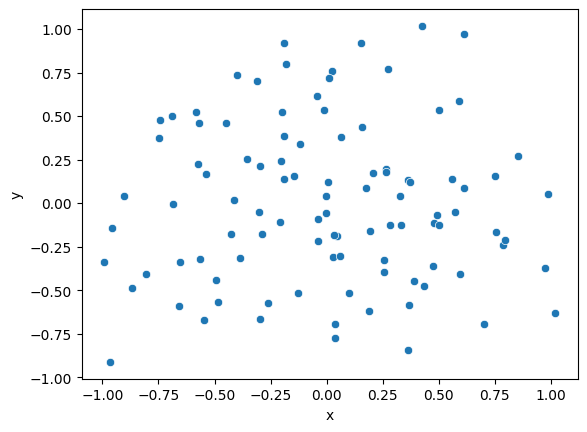

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# create some random embeddings
embeddings = np.random.rand(100, 50)

# apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(embeddings)

# create a pandas dataframe
df = pd.DataFrame({'x': components[:, 0], 'y': components[:, 1]})

# plot the values
sns.scatterplot(data=df, x='x', y='y')
plt.show()

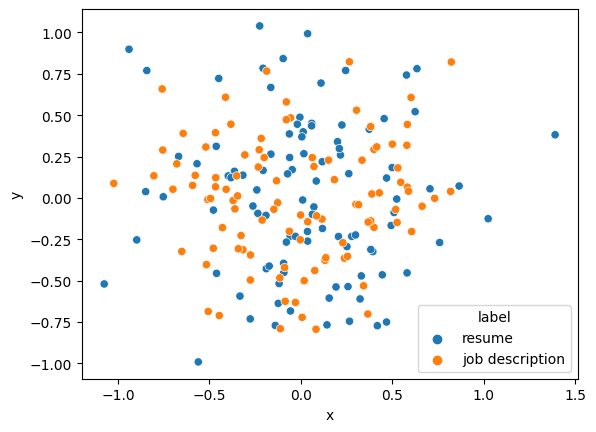

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# create some random embeddings for resumes and job descriptions
resume_embeddings = np.random.rand(100, 50)
job_description_embeddings = np.random.rand(100, 50)

# combine the embeddings into one matrix
embeddings = np.concatenate([resume_embeddings, job_description_embeddings])

# create labels for the embeddings
resume_labels = ['resume'] * 100
job_description_labels = ['job description'] * 100
labels = resume_labels + job_description_labels

# apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(embeddings)

# create a pandas dataframe with the components and labels
df = pd.DataFrame({'x': components[:, 0], 'y': components[:, 1], 'label': labels})

# plot the values
sns.scatterplot(data=df, x='x', y='y', hue='label')
plt.show()

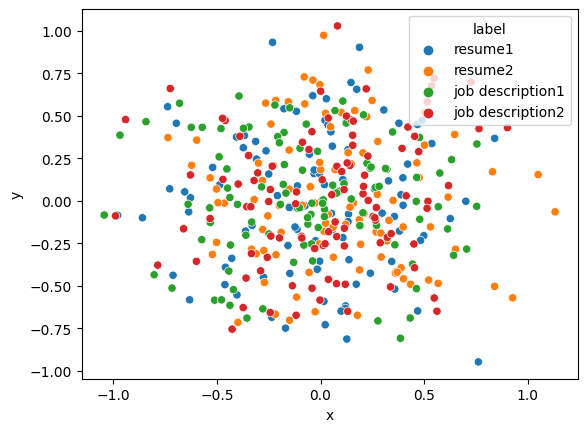

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# create some random embeddings for resumes and job descriptions
resume1_embeddings = np.random.rand(100, 50)
resume2_embeddings = np.random.rand(100, 50)
job_description1_embeddings = np.random.rand(100, 50)
job_description2_embeddings = np.random.rand(100, 50)

# combine the embeddings into one matrix
embeddings = np.concatenate([resume1_embeddings, resume2_embeddings, job_description1_embeddings, job_description2_embeddings])

# create labels for the embeddings
resume1_labels = ['resume1'] * 100
resume2_labels = ['resume2'] * 100
job_description1_labels = ['job description1'] * 100
job_description2_labels = ['job description2'] * 100
labels = resume1_labels + resume2_labels + job_description1_labels + job_description2_labels

# apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(embeddings)

# create a pandas dataframe with the components and labels
df = pd.DataFrame({'x': components[:, 0], 'y': components[:, 1], 'label': labels})

# plot the values
sns.scatterplot(data=df, x='x', y='y', hue='label')
plt.show()

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# create some random embeddings for resumes and job descriptions
resume1_embeddings = np.random.rand(100, 50)
resume2_embeddings = np.random.rand(100, 50)
job_description1_embeddings = np.random.rand(100, 50)
job_description2_embeddings = np.random.rand(100, 50)

In [4]:
resume1_embeddings[1]

array([0.29228945, 0.36752009, 0.35104545, 0.16722226, 0.66558803,
       0.09147503, 0.22038472, 0.79961638, 0.79756599, 0.50885126,
       0.11150552, 0.4889723 , 0.076495  , 0.51090127, 0.14178954,
       0.5842653 , 0.76801005, 0.53403426, 0.53501935, 0.62629288,
       0.47207077, 0.109137  , 0.65460449, 0.94572711, 0.65019665,
       0.20350922, 0.112193  , 0.31285754, 0.37256917, 0.7494508 ,
       0.32169789, 0.76451818, 0.28414252, 0.92507827, 0.61672171,
       0.51331071, 0.73225549, 0.29063061, 0.74319267, 0.91495628,
       0.07801325, 0.42648573, 0.40079885, 0.87047327, 0.5795455 ,
       0.84038577, 0.20312086, 0.89685687, 0.98001928, 0.50326486])

In [8]:
import spacy
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Load the pre-trained SentenceTransformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Example resume text
resume_text = "Skills: Programming Languages: Python, pandas, numpy, scipy, scikitlearn, matplotlib, SQL, Java, JavaScript, jQuery   Machine Learning: Regression, SVM, Naive Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language Processing, Dimensionality Reduction, Topic Modelling LDA, NMF, PCA, Neural Nets  Database: MySQL, SQL Server, Cassandra, Hbase, ElasticSearch  Visualizations: D3.js, DC.js, Plotly, Kibana, Matplotlib, ggplot, Tableau   Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, Computer Vision, OpenCV, and understanding of Deep Learning Education Details:Data Science Assurance Associate, Ernst  Young LLP Skill Details:    JavaScript Experience: 24 months  jQuery Experience: 24 months    Python Experience: 24 months Company Details:   Company: Ernst  Young LLP escription: Fraud Investigations and Dispute Services Assurance, TECHNOLOGY ASSISTED REVIEW TAR: Technology Assisted Review assists in accelerating the review process and running analytics to generate reports. Core member of a team that helped in developing an automated review platform tool from scratch for assisting Ediscovery domain. This tool implements predictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyer's review. Understand the endtoend flow of the solution, doing research and development for classification models, predictive analysis, and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool. TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models to identify red flags and fraudrelated issues. Tools/Technologies:         Python: scikitlearn, tfidf, word2vec, doc2vec, cosine similarity, Naive Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis Matplotlib, Tableau dashboard for reporting Multiple Data Science and Analytic Projects:  USA Clients Text Analytics: Motor Vehicle Customer Review Data. Received customer feedback survey data for the past year. Performed sentiment Positive/Negative/Neutral and timeseries analysis on customer comments across all 4 categories. Created a heat map of terms by survey category based on the frequency of words. Extracted Positive and Negative words across all the Survey categories and plotted Word cloud. Created customized Tableau dashboards for effective reporting and visualizations.  Chatbot: Developed a userfriendly chatbot for one of our products which handles simple questions about hours of operation, reservation options, and so on. This chatbot serves entire productrelated questions, giving an overview of the tool via QA platform and also gives recommendation responses so that user question to build a chain of relevant answers. This tool has intelligence to build the pipeline of questions as per user requirements and asks relevant recommended questions. Information Governance: Organizations make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk. Scan data from multiple sources of formats and parse different file formats, extract metadata information, push results for indexing ElasticSearch, and create customized interactive dashboards using Kibana. Preforming ROT Analysis on the data which gives information about data that helps identify content that is either Redundant, Outdated, or Trivial. Preforming fulltext search analysis on ElasticSearch with predefined methods that can tag as PII personally identifiable information social security numbers, addresses, names, etc., which are frequently targeted during cyber attacks. Fraud Analytic Platform: Fraud Analytics and investigative platform to review all red flag cases. FAP is a Fraud Analytics and investigative platform with an inbuilt case manager and a suite of Analytics for various ERP systems. It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics. "

# Split the resume into sentences using spaCy
doc = nlp(resume_text)
sentences = [sent.text for sent in doc.sents]

# Create embeddings for each sentence using SentenceTransformer
sentence_embeddings = model.encode(sentences)

# Print the sentence embeddings
for sent, emb in zip(sentences, sentence_embeddings):
    print(f"Sentence: {sent}")
    print(f"Embedding: {emb}")
    print()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.5 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=e805ec7cb3a4f4f79ce7a043fad1742772b37919650c238fbe3ac134ac44f4f0
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


Sentence: Skills: Programming Languages: Python, pandas, numpy, scipy, scikitlearn, matplotlib, SQL, Java, JavaScript, jQuery   Machine Learning: Regression, SVM, Naive Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language Processing, Dimensionality Reduction, Topic Modelling LDA, NMF, PCA, Neural Nets  Database: MySQL, SQL Server, Cassandra, Hbase, ElasticSearch  Visualizations: D3.js, DC.js, Plotly, Kibana, Matplotlib, ggplot, Tableau   Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, Computer Vision, OpenCV, and understanding of Deep Learning Education Details:Data Science Assurance Associate, Ernst  Young LLP Skill Details:    
Embedding: [-0.2710927  -0.40140465 -0.11140788 -0.31131023  0.0027354  -0.0640557
 -0.28979015 -0.07885759 -0.11093302  0.17079757 -0.23218063  0.12324513
  0.34825182  0.04008368 -0.08807361  0.12402491  0.05233553  0.13276745
 -0.0

In [8]:
!pip install transformers
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Example text chunks
text_chunks = ["I love natural language processing", "This is a sample sentence"]

# Tokenize and encode the text chunks
encoded_inputs = tokenizer(text_chunks, padding=True, truncation=True, return_tensors='pt')

# Generate embeddings
with torch.no_grad():
    model_output = model(**encoded_inputs)

# Extract the embeddings
embeddings = model_output.last_hidden_state

# Print the embeddings
for i, chunk in enumerate(text_chunks):
    print(f"Embeddings for chunk {i+1}:")
    print(embeddings[i])
    print()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.9 MB/s eta 0:00:00


Embeddings for chunk 1:
tensor([[-0.0264,  0.2223, -0.1408,  ..., -0.0352,  0.1298,  0.3851],
        [ 0.4655,  0.2747, -0.4151,  ..., -0.0558,  0.3812,  0.3176],
        [ 0.9949,  1.1442,  0.1125,  ...,  0.0761,  0.2811,  0.3166],
        ...,
        [-0.2208,  0.4178, -0.2743,  ..., -0.7288, -0.0709,  0.1915],
        [-0.2161, -0.3914, -0.3935,  ...,  0.7627,  0.1068, -0.0741],
        [ 0.8094,  0.2168, -0.3047,  ...,  0.2330, -0.7237, -0.1818]])

Embeddings for chunk 2:
tensor([[-0.2810, -0.0482, -0.1013,  ..., -0.4972,  0.1912,  0.9041],
        [-0.7726, -0.5249, -0.0580,  ..., -0.6560,  0.6868,  0.3801],
        [-0.3695, -0.5830,  0.4278,  ..., -0.4327,  0.0379,  0.9097],
        ...,
        [-0.1463, -0.3780,  0.0361,  ..., -0.4566, -0.2561, -0.1740],
        [-0.2732, -0.2735, -0.4977,  ...,  0.2958, -0.0060, -0.1572],
        [ 0.6660, -0.1010, -0.4946,  ...,  0.4617, -0.8314, -0.1667]])



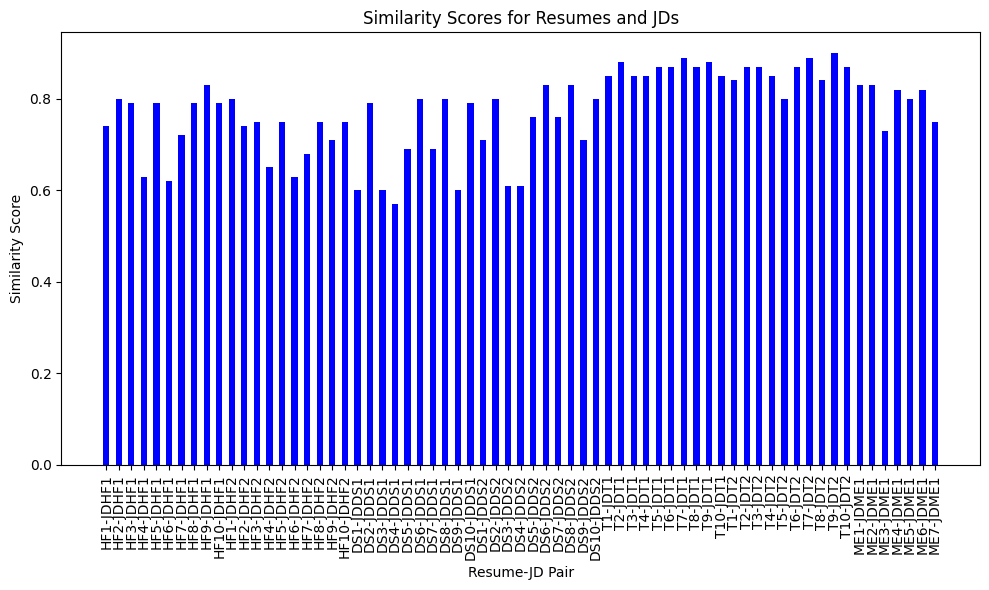

In [11]:
import matplotlib.pyplot as plt

# Data from the Similarity_JD_Resumes (5).csv
data = [
    ('HF1', 'JDHF1', 0.74), ('HF2', 'JDHF1', 0.8), ('HF3', 'JDHF1', 0.79), ('HF4', 'JDHF1', 0.63), ('HF5', 'JDHF1', 0.79),
    ('HF6', 'JDHF1', 0.62), ('HF7', 'JDHF1', 0.72), ('HF8', 'JDHF1', 0.79), ('HF9', 'JDHF1', 0.83), ('HF10', 'JDHF1', 0.79),
    ('HF1', 'JDHF2', 0.8), ('HF2', 'JDHF2', 0.74), ('HF3', 'JDHF2', 0.75), ('HF4', 'JDHF2', 0.65), ('HF5', 'JDHF2', 0.75),
    ('HF6', 'JDHF2', 0.63), ('HF7', 'JDHF2', 0.68), ('HF8', 'JDHF2', 0.75), ('HF9', 'JDHF2', 0.71), ('HF10', 'JDHF2', 0.75),
    ('DS1', 'JDDS1', 0.6), ('DS2', 'JDDS1', 0.79), ('DS3', 'JDDS1', 0.6), ('DS4', 'JDDS1', 0.57), ('DS5', 'JDDS1', 0.69),
    ('DS6', 'JDDS1', 0.8), ('DS7', 'JDDS1', 0.69), ('DS8', 'JDDS1', 0.8), ('DS9', 'JDDS1', 0.6), ('DS10', 'JDDS1', 0.79),
    ('DS1', 'JDDS2', 0.71), ('DS2', 'JDDS2', 0.8), ('DS3', 'JDDS2', 0.61), ('DS4', 'JDDS2', 0.61), ('DS5', 'JDDS2', 0.76),
    ('DS6', 'JDDS2', 0.83), ('DS7', 'JDDS2', 0.76), ('DS8', 'JDDS2', 0.83), ('DS9', 'JDDS2', 0.71), ('DS10', 'JDDS2', 0.8),
    ('T1', 'JDT1', 0.85), ('T2', 'JDT1', 0.88), ('T3', 'JDT1', 0.85), ('T4', 'JDT1', 0.85), ('T5', 'JDT1', 0.87),
    ('T6', 'JDT1', 0.87), ('T7', 'JDT1', 0.89), ('T8', 'JDT1', 0.87), ('T9', 'JDT1', 0.88), ('T10', 'JDT1', 0.85),
    ('T1', 'JDT2', 0.84), ('T2', 'JDT2', 0.87), ('T3', 'JDT2', 0.87), ('T4', 'JDT2', 0.85), ('T5', 'JDT2', 0.8),
    ('T6', 'JDT2', 0.87), ('T7', 'JDT2', 0.89), ('T8', 'JDT2', 0.84), ('T9', 'JDT2', 0.9), ('T10', 'JDT2', 0.87),
    ('ME1', 'JDME1', 0.83), ('ME2', 'JDME1', 0.83), ('ME3', 'JDME1', 0.73), ('ME4', 'JDME1', 0.82), ('ME5', 'JDME1', 0.8),
    ('ME6', 'JDME1', 0.82), ('ME7', 'JDME1', 0.75)]


# Prepare data for plotting
resumes = []
job_descs = []
similarities = []

for item in data:
    resumes.append(item[0])
    job_descs.append(item[1])
    similarities.append(item[2])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(data))

# Customize the plot
ax.bar(x, similarities, width=0.5, color='b')

# Set labels and title
ax.set_xlabel('Resume-JD Pair')
ax.set_ylabel('Similarity Score')
ax.set_title('Similarity Scores for Resumes and JDs')

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels([f'{resumes[i]}-{job_descs[i]}' for i in range(len(data))], rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

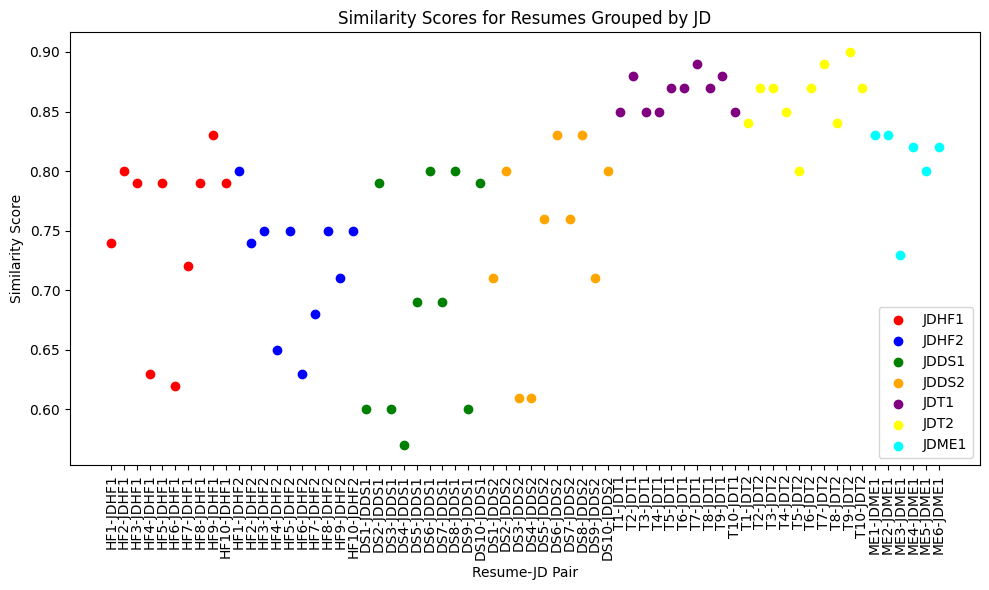

In [12]:
import matplotlib.pyplot as plt

# Data from the Similarity_JD_Resumes (5).csv
data = [
    ('HF1', 'JDHF1', 0.74), ('HF2', 'JDHF1', 0.8), ('HF3', 'JDHF1', 0.79), ('HF4', 'JDHF1', 0.63), ('HF5', 'JDHF1', 0.79),
    ('HF6', 'JDHF1', 0.62), ('HF7', 'JDHF1', 0.72), ('HF8', 'JDHF1', 0.79), ('HF9', 'JDHF1', 0.83), ('HF10', 'JDHF1', 0.79),
    ('HF1', 'JDHF2', 0.8), ('HF2', 'JDHF2', 0.74), ('HF3', 'JDHF2', 0.75), ('HF4', 'JDHF2', 0.65), ('HF5', 'JDHF2', 0.75),
    ('HF6', 'JDHF2', 0.63), ('HF7', 'JDHF2', 0.68), ('HF8', 'JDHF2', 0.75), ('HF9', 'JDHF2', 0.71), ('HF10', 'JDHF2', 0.75),
    ('DS1', 'JDDS1', 0.6), ('DS2', 'JDDS1', 0.79), ('DS3', 'JDDS1', 0.6), ('DS4', 'JDDS1', 0.57), ('DS5', 'JDDS1', 0.69),
    ('DS6', 'JDDS1', 0.8), ('DS7', 'JDDS1', 0.69), ('DS8', 'JDDS1', 0.8), ('DS9', 'JDDS1', 0.6), ('DS10', 'JDDS1', 0.79),
    ('DS1', 'JDDS2', 0.71), ('DS2', 'JDDS2', 0.8), ('DS3', 'JDDS2', 0.61), ('DS4', 'JDDS2', 0.61), ('DS5', 'JDDS2', 0.76),
    ('DS6', 'JDDS2', 0.83), ('DS7', 'JDDS2', 0.76), ('DS8', 'JDDS2', 0.83), ('DS9', 'JDDS2', 0.71), ('DS10', 'JDDS2', 0.8),
    ('T1', 'JDT1', 0.85), ('T2', 'JDT1', 0.88), ('T3', 'JDT1', 0.85), ('T4', 'JDT1', 0.85), ('T5', 'JDT1', 0.87),
    ('T6', 'JDT1', 0.87), ('T7', 'JDT1', 0.89), ('T8', 'JDT1', 0.87), ('T9', 'JDT1', 0.88), ('T10', 'JDT1', 0.85),
    ('T1', 'JDT2', 0.84), ('T2', 'JDT2', 0.87), ('T3', 'JDT2', 0.87), ('T4', 'JDT2', 0.85), ('T5', 'JDT2', 0.8),
    ('T6', 'JDT2', 0.87), ('T7', 'JDT2', 0.89), ('T8', 'JDT2', 0.84), ('T9', 'JDT2', 0.9), ('T10', 'JDT2', 0.87),
    ('ME1', 'JDME1', 0.83), ('ME2', 'JDME1', 0.83), ('ME3', 'JDME1', 0.73), ('ME4', 'JDME1', 0.82), ('ME5', 'JDME1', 0.8),
    ('ME6', 'JDME1', 0.82)]


# Prepare data for plotting
resumes = []
job_descs = []
similarities = []

for item in data:
    resumes.append(item[0])
    job_descs.append(item[1])
    similarities.append(item[2])

# Create a dictionary to map JDs to colors
jd_colors = {
    'JDHF1': 'red',
    'JDHF2': 'blue',
    'JDDS1': 'green',
    'JDDS2': 'orange',
    'JDT1': 'purple',
    'JDT2': 'yellow',
    'JDME1': 'cyan'
}

# Create lists to store the x and y coordinates for each JD
x_coords = [[] for _ in jd_colors]
y_coords = [[] for _ in jd_colors]

# Populate the coordinates based on JD
for i in range(len(data)):
    jd = job_descs[i]
    x_coords[list(jd_colors.keys()).index(jd)].append(i)
    y_coords[list(jd_colors.keys()).index(jd)].append(similarities[i])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each JD group separately
for i in range(len(jd_colors)):
    ax.scatter(x_coords[i], y_coords[i], c=jd_colors[list(jd_colors.keys())[i]], label=list(jd_colors.keys())[i])

# Set labels and title
ax.set_xlabel('Resume-JD Pair')
ax.set_ylabel('Similarity Score')
ax.set_title('Similarity Scores for Resumes Grouped by JD')

# Set x-axis ticks and labels
ax.set_xticks(range(len(data)))
ax.set_xticklabels([f'{resumes[i]}-{job_descs[i]}' for i in range(len(data))], rotation=90)

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

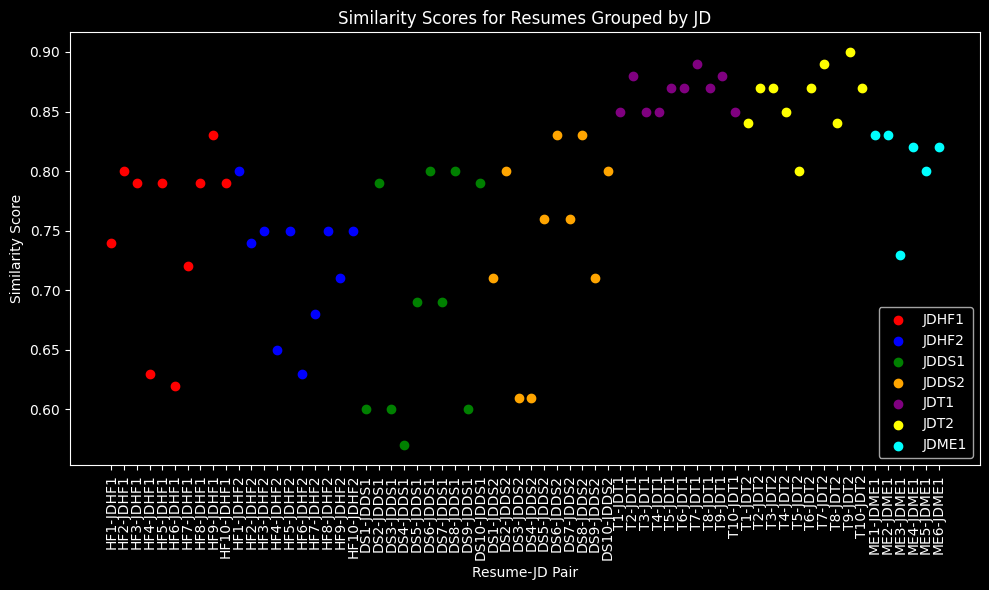

In [13]:
import matplotlib.pyplot as plt
from matplotlib import style

# Set the style to use a black background
style.use('dark_background')

# Data from the Similarity_JD_Resumes (5).csv
data = [
    ('HF1', 'JDHF1', 0.74), ('HF2', 'JDHF1', 0.8), ('HF3', 'JDHF1', 0.79), ('HF4', 'JDHF1', 0.63), ('HF5', 'JDHF1', 0.79),
    ('HF6', 'JDHF1', 0.62), ('HF7', 'JDHF1', 0.72), ('HF8', 'JDHF1', 0.79), ('HF9', 'JDHF1', 0.83), ('HF10', 'JDHF1', 0.79),
    ('HF1', 'JDHF2', 0.8), ('HF2', 'JDHF2', 0.74), ('HF3', 'JDHF2', 0.75), ('HF4', 'JDHF2', 0.65), ('HF5', 'JDHF2', 0.75),
    ('HF6', 'JDHF2', 0.63), ('HF7', 'JDHF2', 0.68), ('HF8', 'JDHF2', 0.75), ('HF9', 'JDHF2', 0.71), ('HF10', 'JDHF2', 0.75),
    ('DS1', 'JDDS1', 0.6), ('DS2', 'JDDS1', 0.79), ('DS3', 'JDDS1', 0.6), ('DS4', 'JDDS1', 0.57), ('DS5', 'JDDS1', 0.69),
    ('DS6', 'JDDS1', 0.8), ('DS7', 'JDDS1', 0.69), ('DS8', 'JDDS1', 0.8), ('DS9', 'JDDS1', 0.6), ('DS10', 'JDDS1', 0.79),
    ('DS1', 'JDDS2', 0.71), ('DS2', 'JDDS2', 0.8), ('DS3', 'JDDS2', 0.61), ('DS4', 'JDDS2', 0.61), ('DS5', 'JDDS2', 0.76),
    ('DS6', 'JDDS2', 0.83), ('DS7', 'JDDS2', 0.76), ('DS8', 'JDDS2', 0.83), ('DS9', 'JDDS2', 0.71), ('DS10', 'JDDS2', 0.8),
    ('T1', 'JDT1', 0.85), ('T2', 'JDT1', 0.88), ('T3', 'JDT1', 0.85), ('T4', 'JDT1', 0.85), ('T5', 'JDT1', 0.87),
    ('T6', 'JDT1', 0.87), ('T7', 'JDT1', 0.89), ('T8', 'JDT1', 0.87), ('T9', 'JDT1', 0.88), ('T10', 'JDT1', 0.85),
    ('T1', 'JDT2', 0.84), ('T2', 'JDT2', 0.87), ('T3', 'JDT2', 0.87), ('T4', 'JDT2', 0.85), ('T5', 'JDT2', 0.8),
    ('T6', 'JDT2', 0.87), ('T7', 'JDT2', 0.89), ('T8', 'JDT2', 0.84), ('T9', 'JDT2', 0.9), ('T10', 'JDT2', 0.87),
    ('ME1', 'JDME1', 0.83), ('ME2', 'JDME1', 0.83), ('ME3', 'JDME1', 0.73), ('ME4', 'JDME1', 0.82), ('ME5', 'JDME1', 0.8),
    ('ME6', 'JDME1', 0.82)]


# Prepare data for plotting
resumes = []
job_descs = []
similarities = []

for item in data:
    resumes.append(item[0])
    job_descs.append(item[1])
    similarities.append(item[2])

# Create a dictionary to map JDs to colors
jd_colors = {
    'JDHF1': 'red',
    'JDHF2': 'blue',
    'JDDS1': 'green',
    'JDDS2': 'orange',
    'JDT1': 'purple',
    'JDT2': 'yellow',
    'JDME1': 'cyan'
}

# Create lists to store the x and y coordinates for each JD
x_coords = [[] for _ in jd_colors]
y_coords = [[] for _ in jd_colors]

# Populate the coordinates based on JD
for i in range(len(data)):
    jd = job_descs[i]
    x_coords[list(jd_colors.keys()).index(jd)].append(i)
    y_coords[list(jd_colors.keys()).index(jd)].append(similarities[i])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color to black
fig.patch.set_facecolor('black')

# Plot each JD group separately
for i in range(len(jd_colors)):
    ax.scatter(x_coords[i], y_coords[i], c=jd_colors[list(jd_colors.keys())[i]], label=list(jd_colors.keys())[i])

# Set labels and title
ax.set_xlabel('Resume-JD Pair')
ax.set_ylabel('Similarity Score')
ax.set_title('Similarity Scores for Resumes Grouped by JD')

# Set x-axis ticks and labels
ax.set_xticks(range(len(data)))
ax.set_xticklabels([f'{resumes[i]}-{job_descs[i]}' for i in range(len(data))], rotation=90)

# Set the text color to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Set the tick colors to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set the legend text color to white
legend = ax.legend()
for text in legend.get_texts():
    text.set_color('white')

# Show the plot
plt.tight_layout()
plt.show()

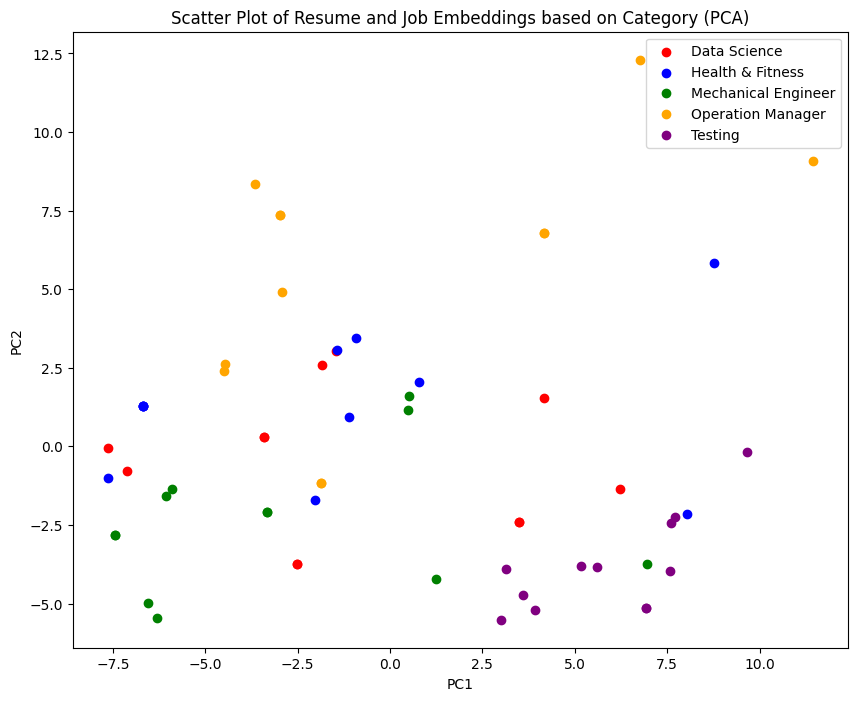

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Read the CSV files
df_resume = pd.read_csv('./CleanedResume_Embeddings.csv')
df_job = pd.read_csv('./CleanedJob_Embeddings.csv')

# Preprocess the embedding values
df_resume['Embeddings'] = df_resume['Embeddings'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
df_job['Embeddings'] = df_job['Embeddings'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

# Extract the relevant columns
resume_embeddings = np.array(df_resume['Embeddings'].tolist())
resume_categories = df_resume['Category'].tolist()
resume_set = df_resume['Set'].tolist()
job_embeddings = np.array(df_job['Embeddings'].tolist())
job_categories = df_job['Category'].tolist()
job_set = df_job['Set'].tolist()

# Combine resume and job embeddings and categories
embeddings = np.concatenate((resume_embeddings, job_embeddings), axis=0)
categories = resume_categories + job_categories
sets = resume_set + job_set

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Create a DataFrame for the PCA embeddings
df_pca = pd.DataFrame(embeddings_pca, columns=['PC1', 'PC2'])
df_pca['Category'] = categories
df_pca['Set'] = sets

df_pca.to_csv('PCA.csv', index=False)
# Plot the scatter plot
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']  # Customize the colors as needed

category_groups = df_pca.groupby('Category')
category_list = list(category_groups.groups.keys())

for category, group in category_groups:
    color = colors[category_list.index(category) % len(colors)]

    plt.scatter(group['PC1'], group['PC2'], color=color, label=category)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of Resume and Job Embeddings based on Category (PCA)')
plt.legend()
plt.show()